In [1]:
import xarray as xr
import sklearn

import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.stats import percentileofscore



#open the files from EC–Earth3-Veg that I have so far

In [2]:
wspeed_hist=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/wspeed/wspeed.EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230901.nc")
wspeed_proj=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/wspeed/wspeed.EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230901.nc")
wspeed_hist

ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/jennaisrael/.conda/envs/geoplot/share/proj failed


<xarray.Dataset> Size: 26GB
Dimensions:    (lon: 559, lat: 495, time: 23741)
Coordinates:
  * lon        (lon) float64 4kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
  * lat        (lat) float64 4kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * time       (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2014-12-31...
Data variables:
    windspeed  (time, lat, lon) float32 26GB ...
Attributes:
    history:   dwpierc2 2023-09-01 12:39:14.001309 /home6/dwpierc2/l2s/AAA_CA...

In [3]:
#NOTE these files have different dates at the end (for different variables) and using a wildcard * seemed to not work
uas_hist=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/uas/uas.EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc")
uas_proj=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/uas/uas.EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc")
uas_hist

<xarray.Dataset> Size: 26GB
Dimensions:  (time: 23741, lat: 495, lon: 559)
Coordinates:
  * time     (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2014-12-31T1...
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Data variables:
    uas      (time, lat, lon) float32 26GB ...
Attributes: (12/81)
    SIOCRD_netCDF_Version:               1.0
    title:                               LOCA statistically downscaled climat...
    history:                             2019-06-05T10:15:32Z ; CMOR rewrote ...
    Conventions:                         CF-1.7 CMIP-6.2
    activity_id:                         CMIP
    branch_method:                       standard
    ...                                  ...
    fname_fine_obs:                      ../../training_data/LOCA2_training_2...
    fname_coarse_obs:                    ../../training_data/LOCA2_training_2...
    fname_gcm_hist:                      ../../Models/EC-Earth3-Veg/0p5x0p5/r...
    fname_gcm_in:                        ../../Models/EC-Earth3-Veg/0p5x0p5/r...
    loca_post_ds_bc_id:                  $Id: loca_post_ds_bc.F90,v 1.49 2023...
    loca_post_ds_bc_source:              $Source: /home6/dwpierc2/src/mine/lo...

In [4]:
vas_hist=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/vas/vas.EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc")
vas_proj=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/vas/vas.EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc")
vas_hist

<xarray.Dataset> Size: 26GB
Dimensions:  (time: 23741, lat: 495, lon: 559)
Coordinates:
  * time     (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2014-12-31T1...
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Data variables:
    vas      (time, lat, lon) float32 26GB ...
Attributes: (12/81)
    SIOCRD_netCDF_Version:               1.0
    title:                               LOCA statistically downscaled climat...
    history:                             2019-06-05T10:15:14Z ; CMOR rewrote ...
    Conventions:                         CF-1.7 CMIP-6.2
    activity_id:                         CMIP
    branch_method:                       standard
    ...                                  ...
    fname_fine_obs:                      ../../training_data/LOCA2_training_2...
    fname_coarse_obs:                    ../../training_data/LOCA2_training_2...
    fname_gcm_hist:                      ../../Models/EC-Earth3-Veg/0p5x0p5/r...
    fname_gcm_in:                        ../../Models/EC-Earth3-Veg/0p5x0p5/r...
    loca_post_ds_bc_id:                  $Id: loca_post_ds_bc.F90,v 1.49 2023...
    loca_post_ds_bc_source:              $Source: /home6/dwpierc2/src/mine/lo...

In [5]:
psl_hist=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/psl/psl.EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc")
psl_proj=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/psl/psl.EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc")
psl_proj                            

<xarray.Dataset> Size: 12GB
Dimensions:  (time: 10958, lat: 495, lon: 559)
Coordinates:
  * time     (time) datetime64[ns] 88kB 2015-01-01T12:00:00 ... 2044-12-31T12...
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Data variables:
    psl      (time, lat, lon) float32 12GB ...
Attributes:
    history:   2023/03/17 22:33:05 dwpierc2: nccd uas.ACCESS-CM2.historical.r...

In [6]:
tasmax_hist=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/tasmax/tasmax.EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc")
tasmax_proj=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/tasmax/tasmax.EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc")
tasmax_proj

<xarray.Dataset> Size: 12GB
Dimensions:  (time: 10958, lat: 495, lon: 559)
Coordinates:
  * time     (time) datetime64[ns] 88kB 2015-01-01T12:00:00 ... 2044-12-31T12...
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Data variables:
    tasmax   (time, lat, lon) float32 12GB ...
Attributes: (12/83)
    SIOCRD_netCDF_Version:               1.0
    title:                               LOCA statistically downscaled climat...
    history:                             2019-06-05T10:15:24Z ; CMOR rewrote ...
    Conventions:                         CF-1.7 CMIP-6.2
    activity_id:                         CMIP
    branch_method:                       standard
    ...                                  ...
    fname_fine_obs:                      ../../training_data/LOCA2_training_2...
    fname_coarse_obs:                    ../../training_data/LOCA2_training_2...
    fname_gcm_hist:                      ../../Models/EC-Earth3-Veg/0p5x0p5/r...
    fname_gcm_in:                        ../../Models/EC-Earth3-Veg/0p5x0p5/r...
    loca_post_ds_bc_id:                  $Id: loca_post_ds_bc.F90,v 1.48 2023...
    loca_post_ds_bc_source:              $Source: /home6/dwpierc2/src/mine/lo...

In [7]:
tasmin_hist=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/tasmin/tasmin.EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc")
tasmin_proj=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/tasmin/tasmin.EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc")
tasmin_proj

<xarray.Dataset> Size: 12GB
Dimensions:                           (time: 10958, lat: 495, lon: 559)
Coordinates:
  * time                              (time) datetime64[ns] 88kB 2015-01-01T1...
  * lat                               (lat) float32 2kB 29.58 29.61 ... 45.02
  * lon                               (lon) float32 2kB 231.6 231.6 ... 249.0
Data variables:
    tasmax_minus_tasmax_minus_tasmin  (time, lat, lon) float32 12GB ...
Attributes: (12/215)
    history:                                     2023/01/16 04:37:01 dwpierc2...
    input1_SIOCRD_netCDF_Version:               1.0
    input1_title:                               LOCA statistically downscaled...
    input1_history:                             2019-06-05T10:15:24Z ; CMOR r...
    input1_Conventions:                         CF-1.7 CMIP-6.2
    input1_activity_id:                         CMIP
    ...                                         ...
    input2_fname_coarse_obs:                    ../../training_data/LOCA2_tra...
    input2_fname_gcm_hist:                      ../../Models/EC-Earth3-Veg/0p...
    input2_fname_gcm_in:                        ../../Models/EC-Earth3-Veg/0p...
    input2_experiment:                          
    input2_loca_post_ds_bc_id:                  $Id: loca_post_ds_bc.F90,v 1....
    input2_loca_post_ds_bc_source:              $Source: /home6/dwpierc2/src/...

In [8]:
pr_hist=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/pr/pr.EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.LOCA2_CA_hybrid_v20230115.nc")
pr_proj=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/cirrus_LOCA2/pr/pr.EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc")
pr_proj

<xarray.Dataset> Size: 12GB
Dimensions:  (time: 10958, lat: 495, lon: 559)
Coordinates:
  * time     (time) datetime64[ns] 88kB 2015-01-01T12:00:00 ... 2044-12-31T12...
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Data variables:
    pr       (time, lat, lon) float32 12GB ...
Attributes: (12/81)
    SIOCRD_netCDF_Version:               1.0
    title:                               LOCA statistically downscaled climat...
    history:                             2019-06-05T10:15:32Z ; CMOR rewrote ...
    Conventions:                         CF-1.7 CMIP-6.2
    activity_id:                         CMIP
    branch_method:                       standard
    ...                                  ...
    fname_fine_obs:                      ../../training_data/LOCA2_training_2...
    fname_coarse_obs:                    ../../training_data/LOCA2_training_2...
    fname_gcm_hist:                      ../../Models/EC-Earth3-Veg/0p5x0p5/r...
    fname_gcm_in:                        ../../Models/EC-Earth3-Veg/0p5x0p5/r...
    loca_post_ds_bc_id:                  $Id: loca_post_ds_bc.F90,v 1.48 2023...
    loca_post_ds_bc_source:              $Source: /home6/dwpierc2/src/mine/lo...

#index is in lat and lon! pull coordinates for point reyes and monterey bay 

In [9]:
#for this model, the lon needs to be between 232-248
prlon=360-122.973333
mblon=360-121.891667

In [10]:
pt_reyes=[37.995, prlon] # no negative signs in this case
mo_bay=[36.608333, mblon]

In [11]:
##test indexing 
#wspeed_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")

In [12]:
#compile the variables for each station into a csv
#cleaned aws data has header as follows:
#,datetime,month,LWDOWN_W/m2,prec_mm/day,PSFC_Pa,Q2_kg/kg,SWDOWN_W/m2,T2_celsius,tmax_celsius,tmin_celsius,U10_m/s,V10_m/s

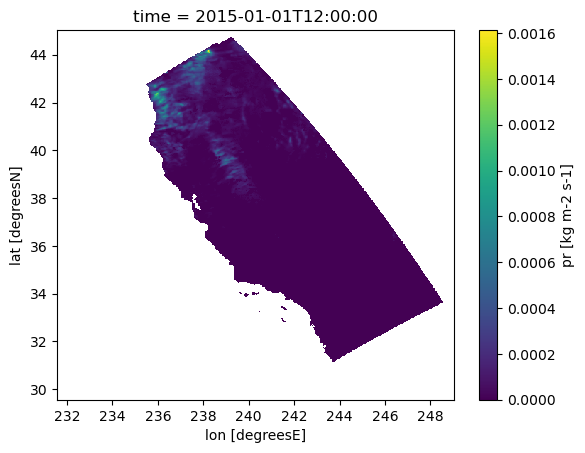

In [24]:
pr_proj.pr.isel(time=0).plot()#.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")

In [17]:
tasmax_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest").tasmax[0:10].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [13]:
#xr.concat([da[:, :1], da[:, 1:]], dim="y")
#df_pr=wspeed_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")
# df_pr=xr.concat([wspeed_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")],[psl_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")],[uas_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")],[vas_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")],dim='time')
df_h_pr=xr.merge([wspeed_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),psl_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),
                  uas_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),vas_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),
                  tasmax_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),tasmin_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),
                  pr_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")])

df_h_mb=xr.merge([wspeed_hist.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),psl_hist.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),
                  uas_hist.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),vas_hist.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),
                  tasmax_hist.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),tasmin_hist.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),
                  pr_hist.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest")])

df_p_pr=xr.merge([wspeed_proj.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),psl_proj.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),
                  uas_proj.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),vas_proj.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),
                  tasmax_proj.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),tasmin_proj.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest"),
                  pr_proj.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")])

df_p_mb=xr.merge([wspeed_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),psl_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),
                  uas_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),vas_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),
                  tasmax_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),tasmin_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),
                  pr_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest")])
             

In [14]:
# df_p_mb=xr.merge([wspeed_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),psl_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),uas_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest"),vas_proj.sel(lat=mo_bay[0], lon=mo_bay[1],method="nearest")])
             

In [15]:
# df_h_pr.drop_vars(['lon','lat'])

In [16]:
# df_h_pr.drop_vars(['lon','lat']).to_dataframe()

In [17]:
df_h_pr=df_h_pr.assign_coords({"month": (df_h_pr['time'].dt.month)})
df_p_pr=df_p_pr.assign_coords({"month": (df_p_pr['time'].dt.month)})

In [18]:
writepath="/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2"

In [19]:
# #write the above to csvs in global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2
# writepath="/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2"

# df_h_pr.drop_vars(['lon','lat']).to_dataframe().to_csv(writepath+'/'+"EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.pt_reyes.csv")

In [20]:
df_h_mb=df_h_mb.assign_coords({"month": (df_h_mb['time'].dt.month)})
df_p_mb=df_p_mb.assign_coords({"month": (df_p_mb['time'].dt.month)})
df_p_mb

<xarray.Dataset> Size: 482kB
Dimensions:                           (time: 10958)
Coordinates:
    lon                               float64 8B 238.1
    lat                               float64 8B 36.61
  * time                              (time) datetime64[ns] 88kB 2015-01-01T1...
    month                             (time) int64 88kB 1 1 1 1 ... 12 12 12 12
Data variables:
    windspeed                         (time) float32 44kB ...
    psl                               (time) float32 44kB ...
    uas                               (time) float32 44kB ...
    vas                               (time) float32 44kB ...
    tasmax                            (time) float32 44kB ...
    tasmax_minus_tasmax_minus_tasmin  (time) float32 44kB ...
    pr                                (time) float32 44kB ...
Attributes:
    history:   dwpierc2 2023-09-01 21:02:02.415213 /home6/dwpierc2/l2s/AAA_CA...

In [ ]:
df_h_pr.drop_vars(['lon','lat']).to_dataframe().to_csv(writepath+'/'+"EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.pt_reyes.csv")
df_p_pr.drop_vars(['lon','lat']).to_dataframe().to_csv(writepath+'/'+"EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.pt_reyes.csv")
df_h_mb.drop_vars(['lon','lat']).to_dataframe().to_csv(writepath+'/'+"EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.monterey_bay.csv")
df_p_mb.drop_vars(['lon','lat']).to_dataframe().to_csv(writepath+'/'+"EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.monterey_bay.csv")

In [ ]:
# #somehow psl got dropped for projected dataframe for monterey bay
# writepath="/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2"
# df_p_mb.drop_vars(['lon','lat']).to_dataframe().to_csv(writepath+'/'+"EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.monterey_bay.csv")

In [ ]:
# df_pr['time'].astype('datetime64[M]').astype(int) % 12 + 1

In [ ]:
#this made all the months 1??
##add month as a variable
#df_pr['month']=df_pr['time'].astype('datetime64[M]').astype(int) % 12 + 1
#monthv=np.append(monthv,np.array(file.day).astype('datetime64[M]').astype(int) % 12 + 1)

In [ ]:
# df_pr['time'].dt.month

In [ ]:
# #need to set month as a coordinate or dimension in order to use it as an index for the quantile plots
# df_pr=df_pr.assign_coords({"month": (df_pr['time'].dt.month)})

In [ ]:
#make the exceedence plots for the variables at these 2 locations

In [ ]:
# df_pr.variables.keys()

In [ ]:
# varlist = [i.name for i in df_pr.data_vars] 
# varlist

In [ ]:
# [i for i in df_pr.data_vars]

In [ ]:
# np.max(df_pr.month.values)

In [ ]:
# df_pr.month

In [ ]:
df_p_pr=df_p_pr.assign_coords({"month": (df_p_pr['time'].dt.month)})

In [ ]:
#modified from my code from the other loca2 data

#in a loop for each month for each variable
#first get the keys for the column heads
vars=[i for i in df_h_pr.data_vars]#[0:-1] #drop the last variable which is month
print(vars)
monthlist=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
flag=0
subs='_'
for v in vars:
    fig, ax = plt.subplots(3,4,figsize=(10,8),sharey=True)
    fig.suptitle(v)
    varname= v.split(subs)[0]
    for m in np.arange(1,13):
        vm_hist=df_h_pr.where(df_h_pr.month== m,drop=True)[v].values
        vm_proj=df_p_pr.where(df_p_pr.month== m,drop=True)[v].values
        r = (m-1)//4
        c = (m-1)%4
        
        if m==1 :
            flag=1
            ax[r,c].ecdf(vm_hist,label="1950-2014",orientation='horizontal')
            #ax[r,c].ecdf(vm_proj,label="2028-2057",orientation='horizontal',ls="--" )
            ax[r,c].legend()
            ax[r,c].set_ylabel(v)
            ax[r,c].set_xlabel('Empirical CDF')
        else:
            ax[r,c].ecdf(vm_hist,orientation='horizontal')
            #ax[r,c].ecdf(vm_proj,orientation='horizontal',ls="--" )
        ax[r,c].set_title(monthlist[m-1])
        
        
    plt.tight_layout()
    # filename='NE_corner_HRRR_'+varname+'.png'
    # plt.savefig('/global/scratch/users/jennaisrael/time_varying_data/cleaned_aws/quantile_plots/'+filename)

In [ ]:
df_pr.where(df_pr.month== m,drop=True)[v].values

In [ ]:
v

In [ ]:
wspeed_hist.sel(lat=pt_reyes[0], lon=pt_reyes[1],method="nearest")['windspeed'].plot()

In [ ]:
wspeed_hist.isel(time=100)['windspeed'].plot()